<a href="https://colab.research.google.com/github/martynakol/UM-w-finansach/blob/main/Kopia_notatnika_Kopia_notatnika_CASE_1_UM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/case1.csv'

df = pd.read_csv(file_path, sep=';', on_bad_lines='skip')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape

(9841, 51)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

for col in df.select_dtypes(include=['int64']).columns:
    df[col] = df[col].astype('float64')

X = df.drop(columns=['FLAG'])
y = df['FLAG']

In [ ]:
X.head()

,Index,Address,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,1.0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,844.26,1093.71,704785.63,721.0,89.0,0.0,40.0,118.0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,2.0,0x0002b44ddb1476db43c868bd494422ee4c136fed,12709.07,2958.44,1218216.73,94.0,8.0,0.0,5.0,14.0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,3.0,0x0002bda54cb772d040f779e88eb453cac0daa244,246194.54,2434.02,516729.30,2.0,10.0,0.0,10.0,2.0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,4.0,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,10219.60,15785.09,397555.90,25.0,9.0,0.0,7.0,13.0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,5.0,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,36.61,10707.77,382472.42,4598.0,20.0,1.0,7.0,19.0,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [ ]:
X.describe()

,Index,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,1815.049893,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,1222.621830,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,821.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,1641.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,2601.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,4729.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [ ]:
empty_cells_count = X.isna().sum()

print(empty_cells_count)

Index                                                      0
Address                                                    0
Avg min between sent tnx                                   0
Avg min between received tnx                               0
Time Diff between first and last (Mins)                    0
Sent tnx                                                   0
Received Tnx                                               0
Number of Created Contracts                                0
Unique Received From Addresses                             0
Unique Sent To Addresses                                   0
min value received                                         0
max value received                                         0
avg val received                                           0
min val sent                                               0
max val sent                                               0
avg val sent                                               0
min value sent to contra

In [ ]:
numeric_means = X.select_dtypes(include='number').mean()
X.fillna(numeric_means, inplace=True)


In [ ]:
X_numeric_all = X.select_dtypes(include=['float64', 'int64'])
X_categorical = X.select_dtypes(exclude=['float64', 'int64'])

X_numeric_all.shape

(9841, 46)

In [ ]:
X_numeric_all

,Index,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
0,1.0,844.26,1093.71,704785.63,721.0,89.0,0.0,40.0,118.0,0.000000,...,1.500000e+07,2.655861e+05,0.000000,1.683100e+07,2.717799e+05,0.0,0.0,0.0,39.000000,57.000000
1,2.0,12709.07,2958.44,1218216.73,94.0,8.0,0.0,5.0,14.0,0.000000,...,3.650000e+02,5.763262e+01,2.260809,2.260809e+00,2.260809e+00,0.0,0.0,0.0,1.000000,7.000000
2,3.0,246194.54,2434.02,516729.30,2.0,10.0,0.0,10.0,2.0,0.113119,...,4.428198e+02,6.518901e+01,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,8.000000
3,4.0,10219.60,15785.09,397555.90,25.0,9.0,0.0,7.0,13.0,0.000000,...,1.141223e+04,1.555550e+03,100.000000,9.029231e+03,3.804077e+03,0.0,0.0,0.0,1.000000,11.000000
4,5.0,36.61,10707.77,382472.42,4598.0,20.0,1.0,7.0,19.0,0.000000,...,9.000000e+04,4.934232e+03,0.000000,4.500000e+04,1.372666e+04,0.0,0.0,0.0,6.000000,27.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,2175.0,12635.10,631.39,58748.48,4.0,13.0,0.0,11.0,4.0,0.004082,...,1.337000e+00,6.685000e-01,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
9837,2176.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,...,1.337000e+01,1.337000e+01,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
9838,2177.0,2499.44,2189.29,261601.88,67.0,43.0,0.0,31.0,44.0,0.001078,...,1.500000e+03,3.006939e+02,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,5.000000
9839,2178.0,0.00,0.00,0.00,0.0,1.0,0.0,1.0,0.0,0.500000,...,1.252524e+08,4.346203e+06,11741.257297,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676


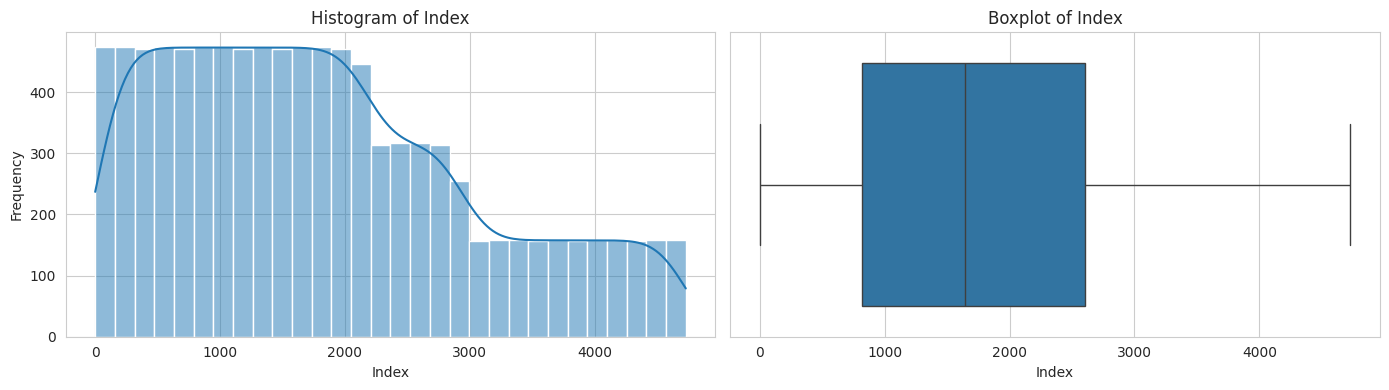

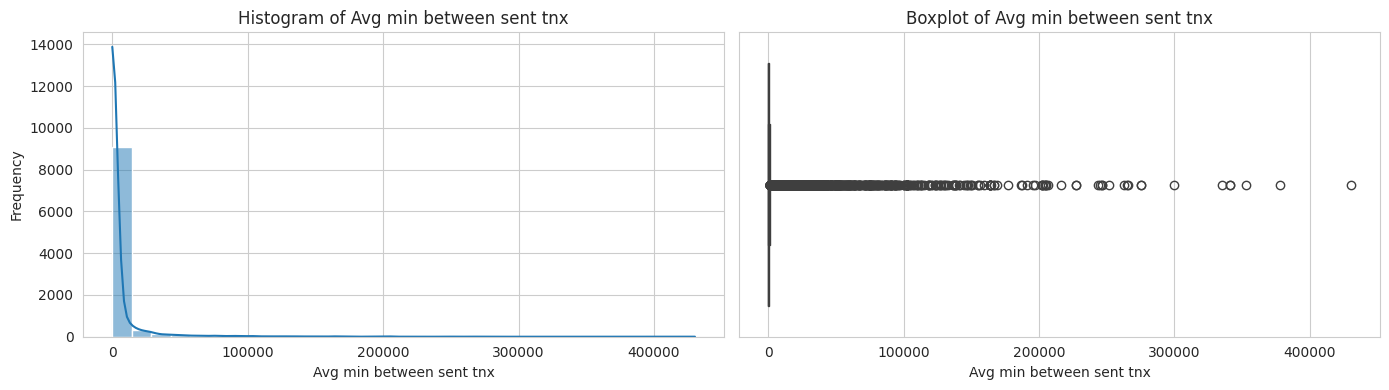

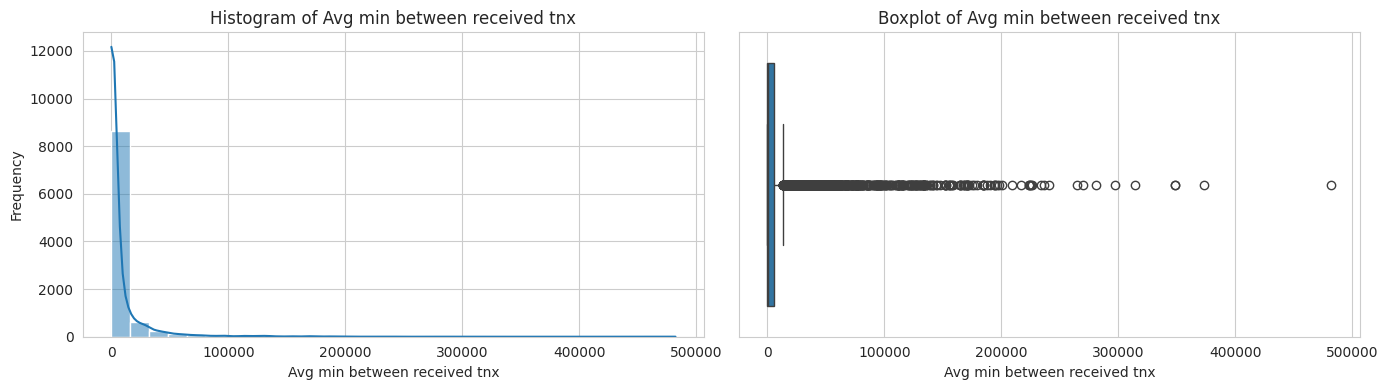

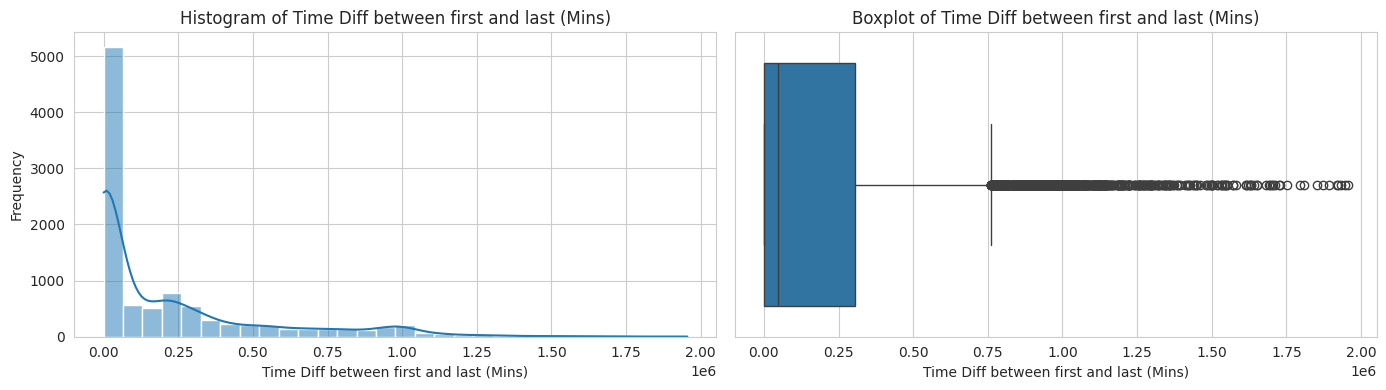

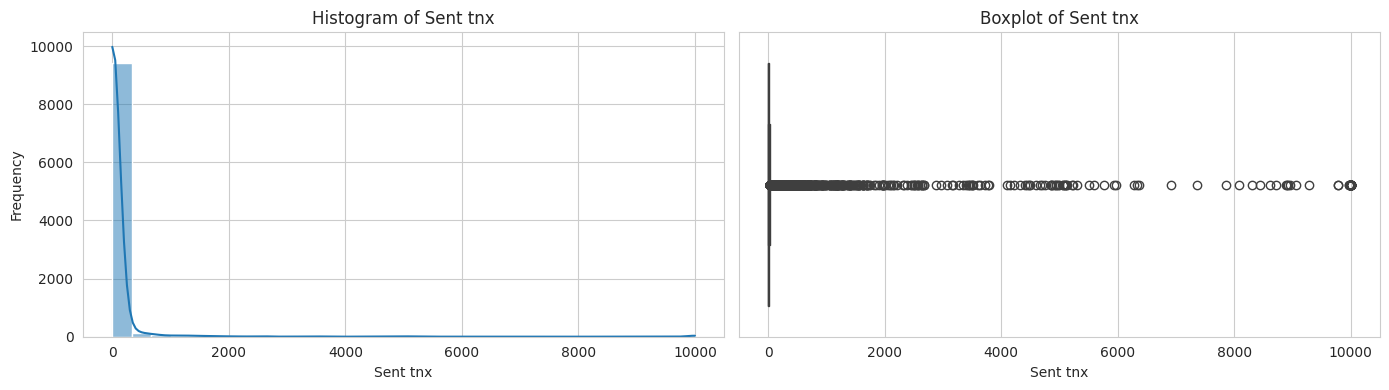

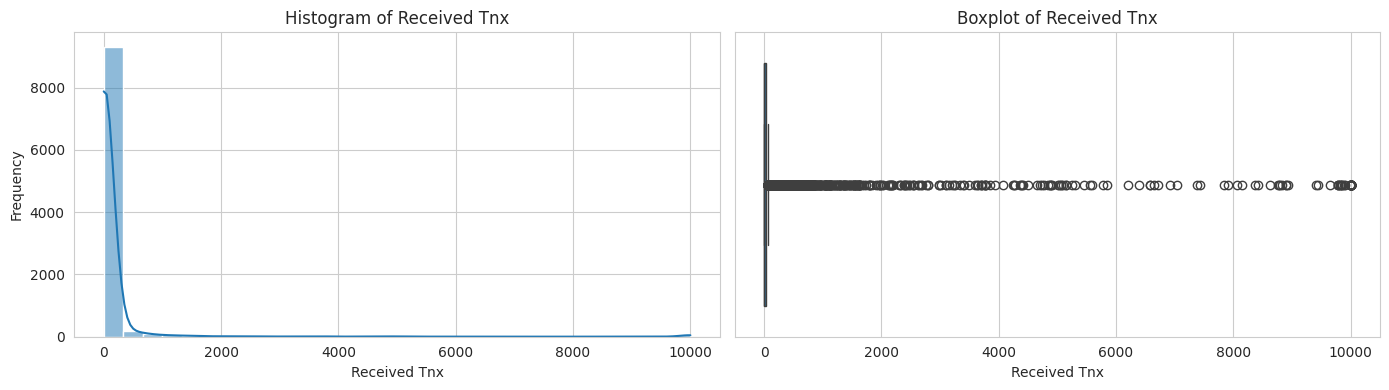

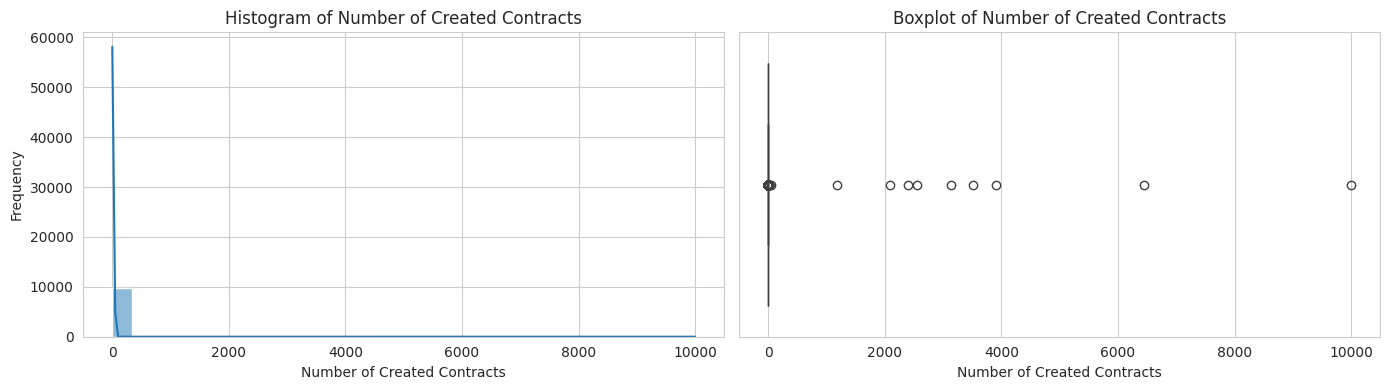

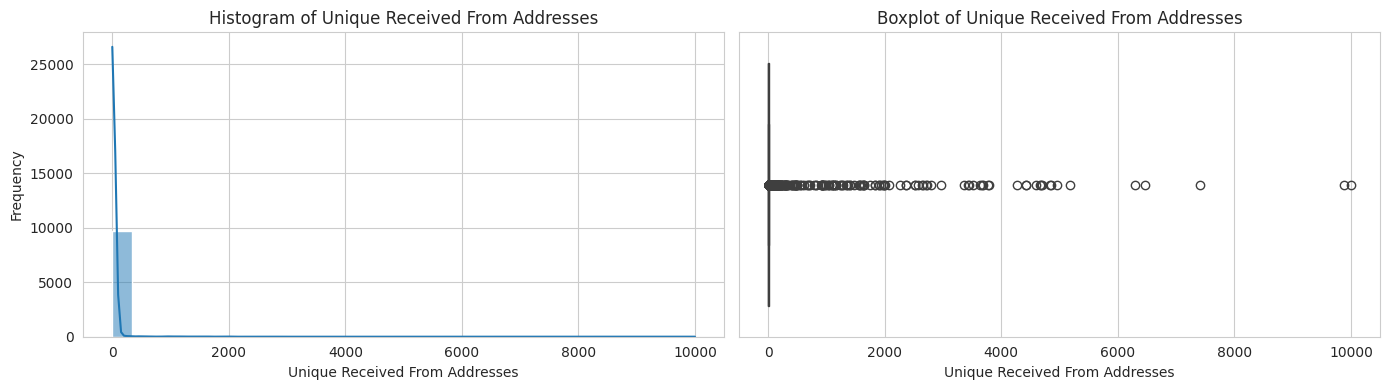

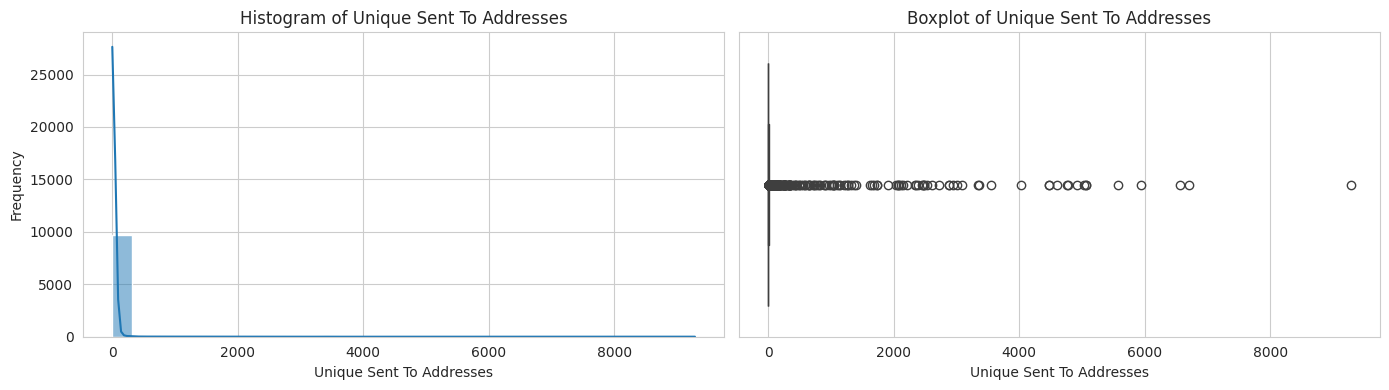

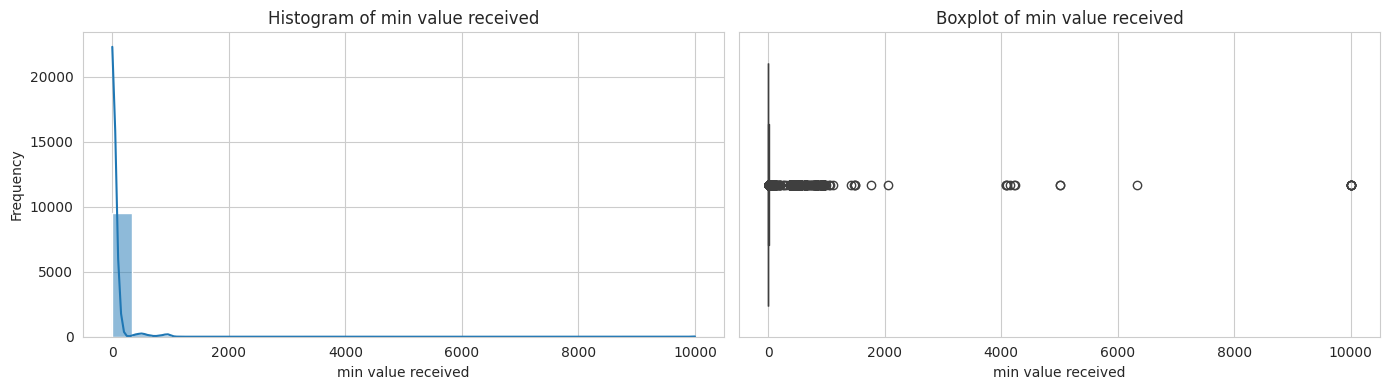

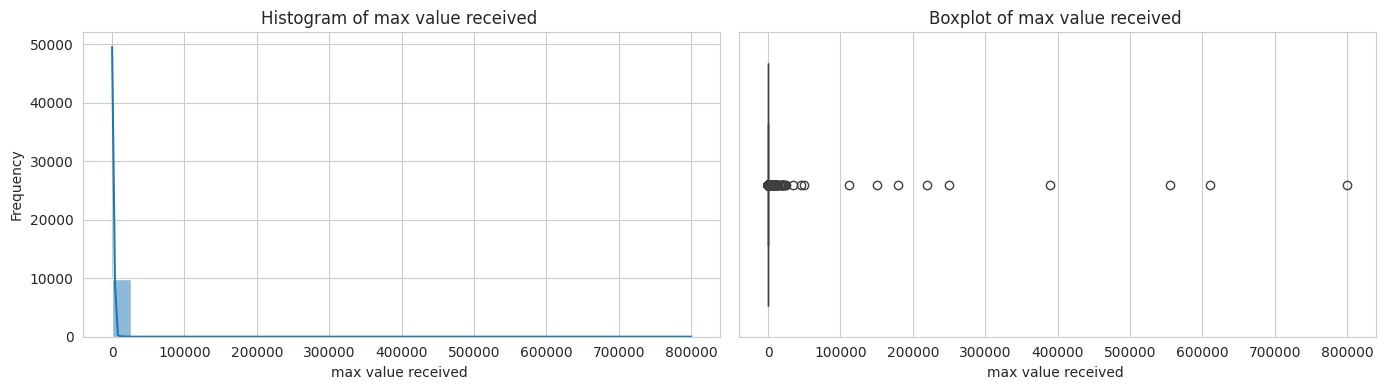

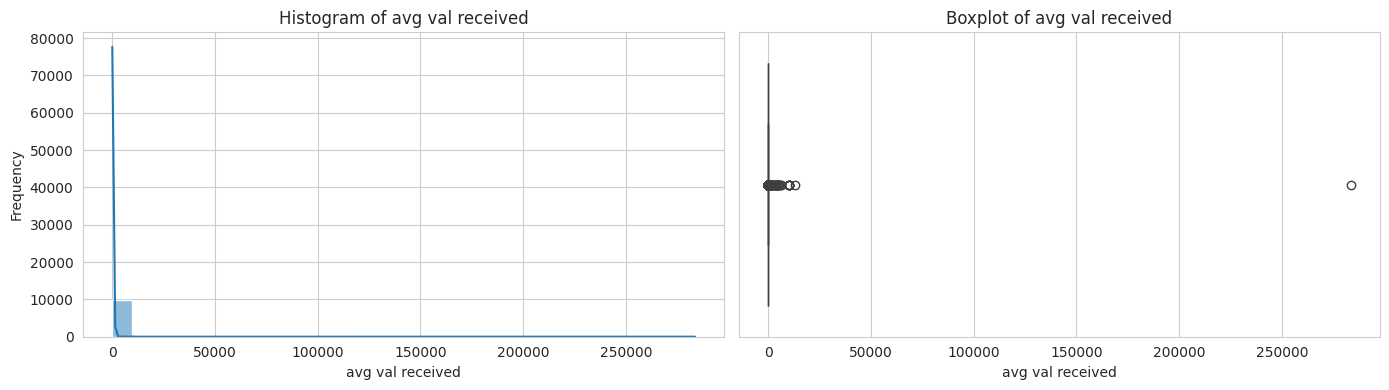

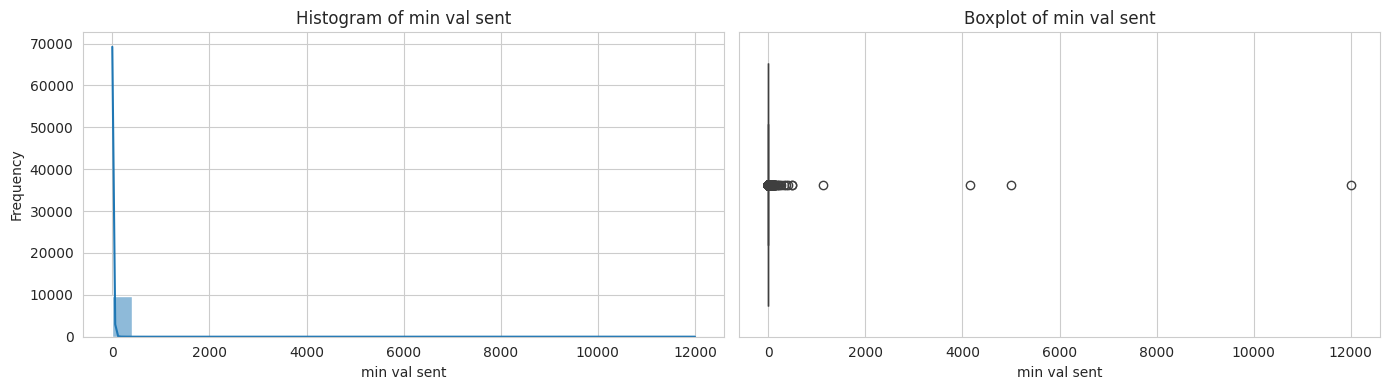

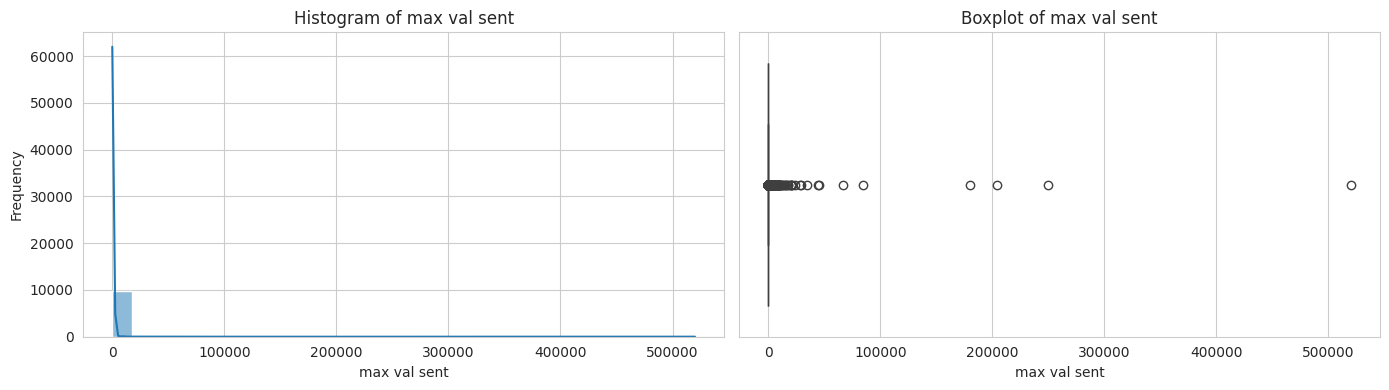

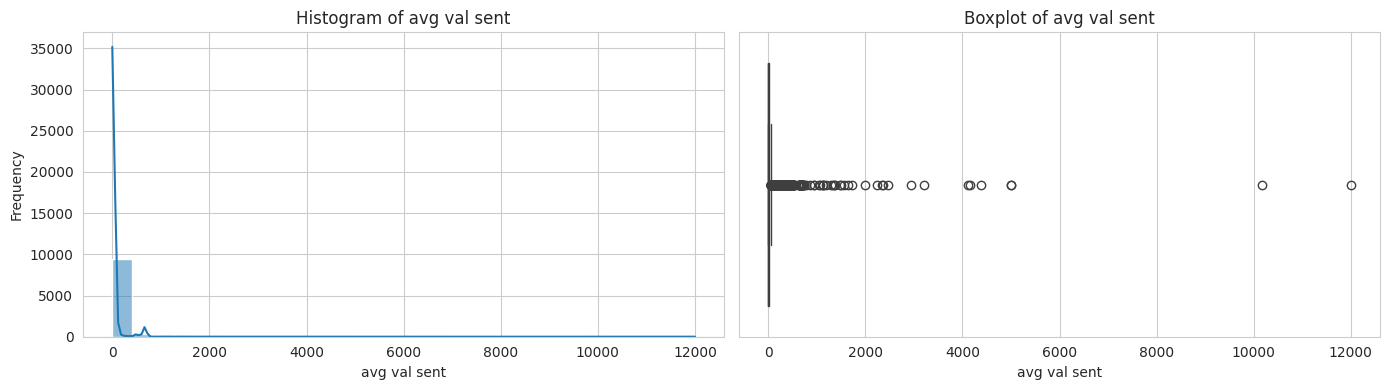

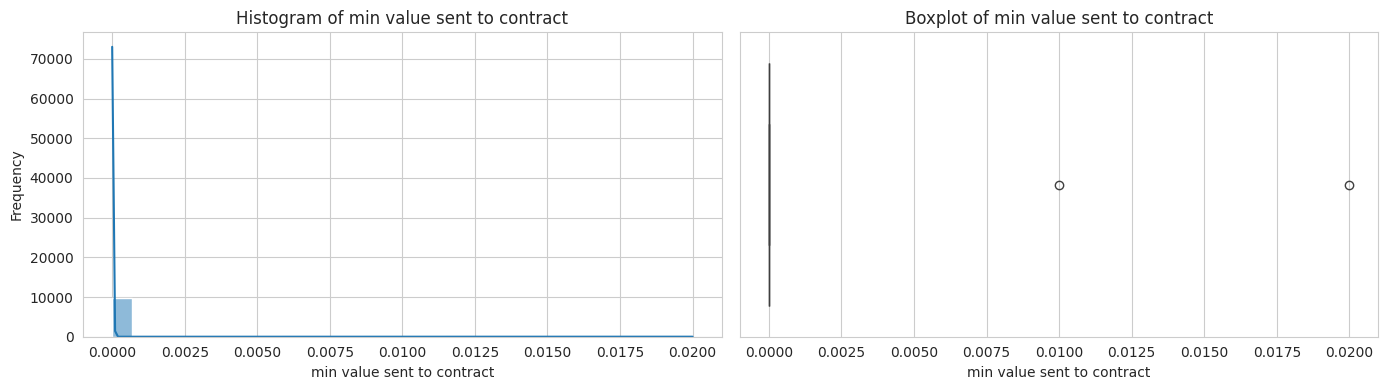

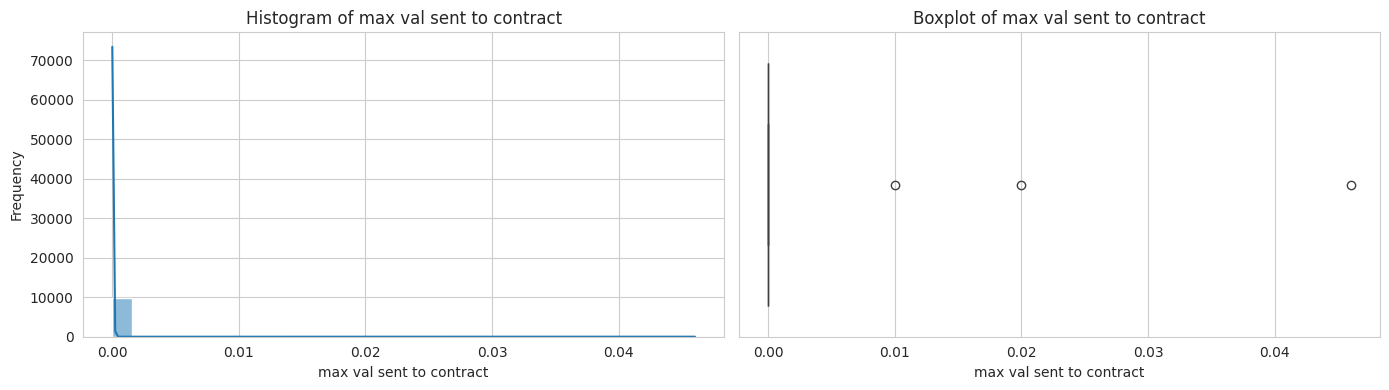

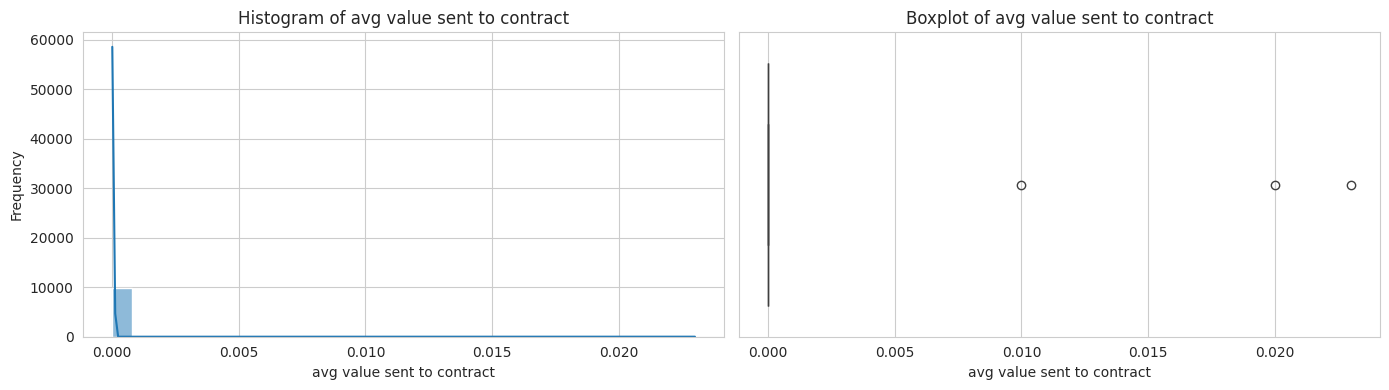

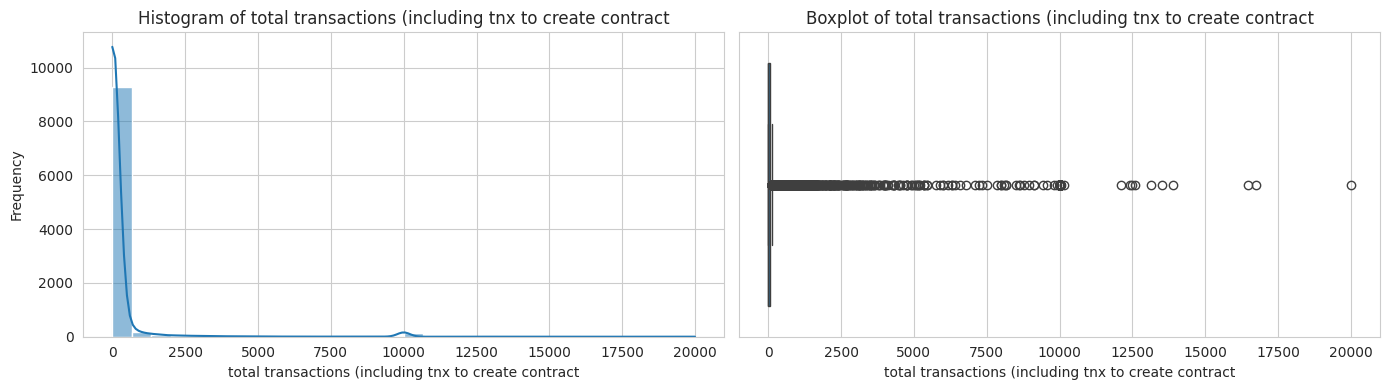

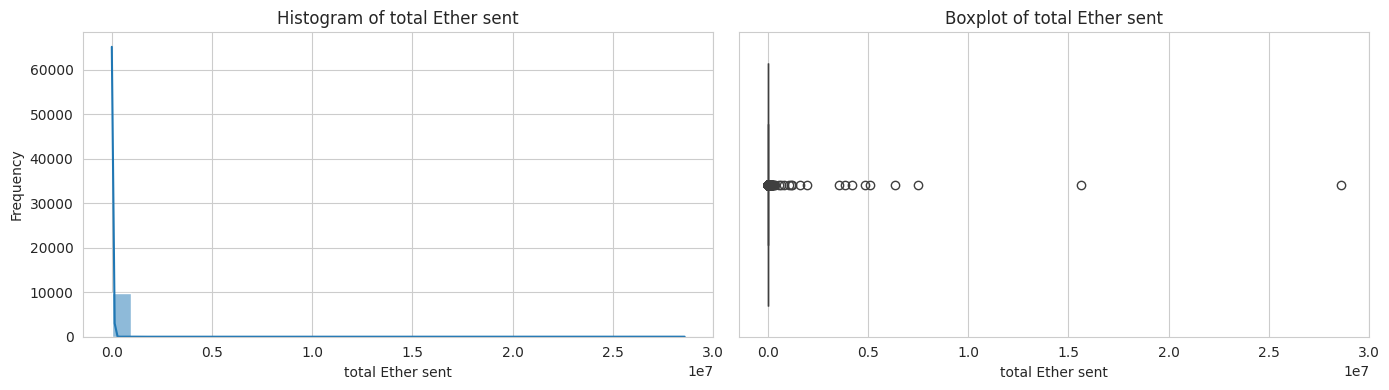

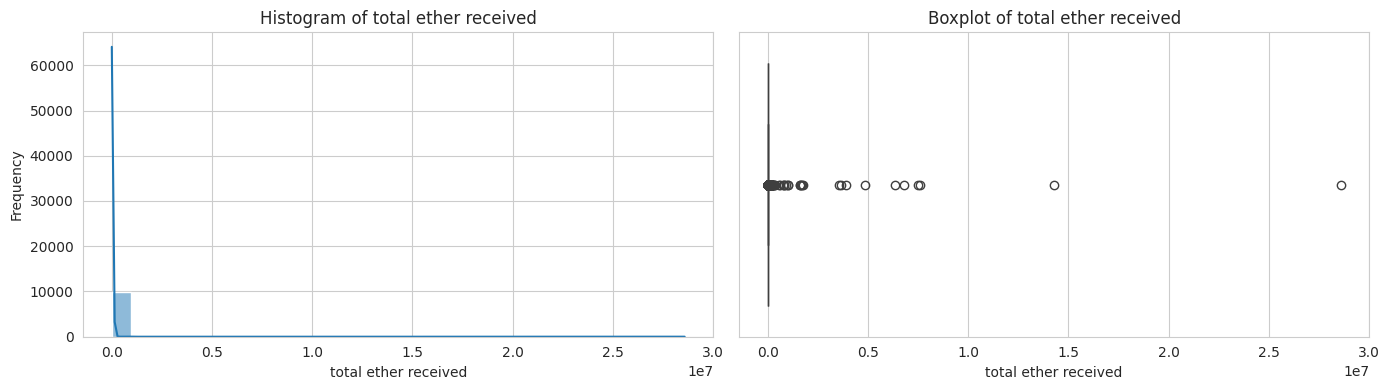

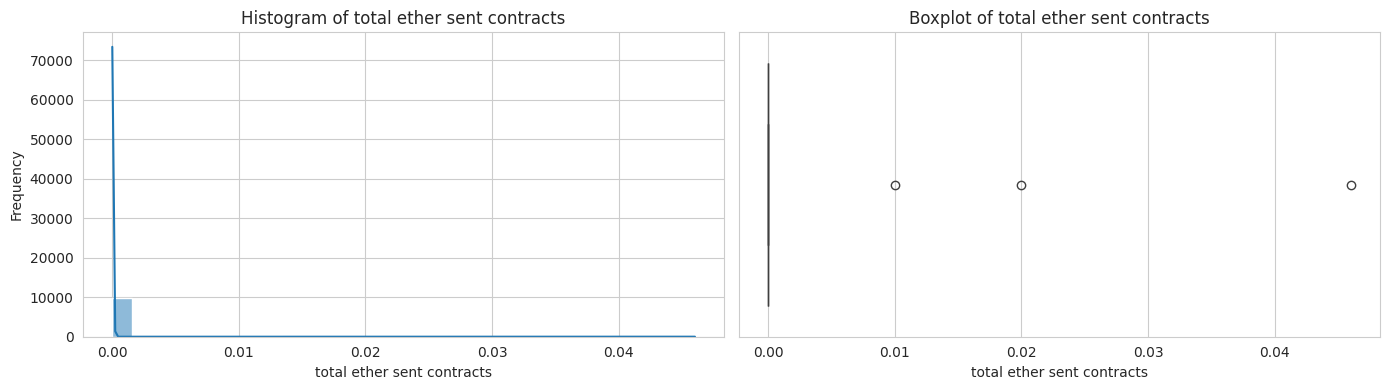

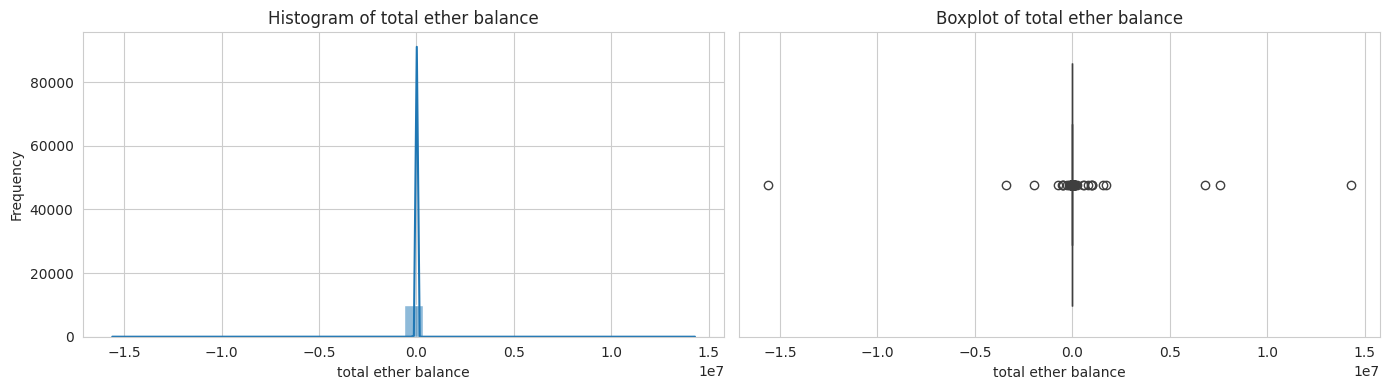

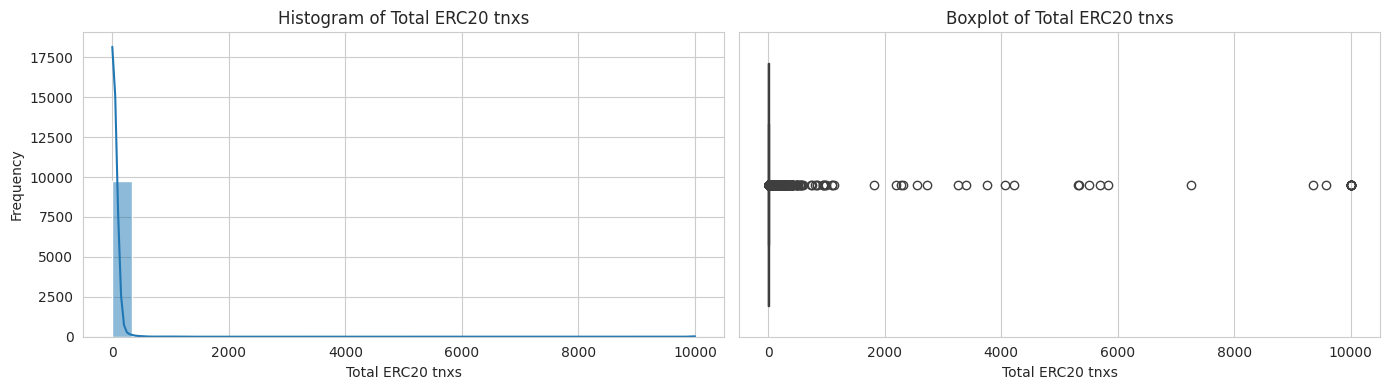

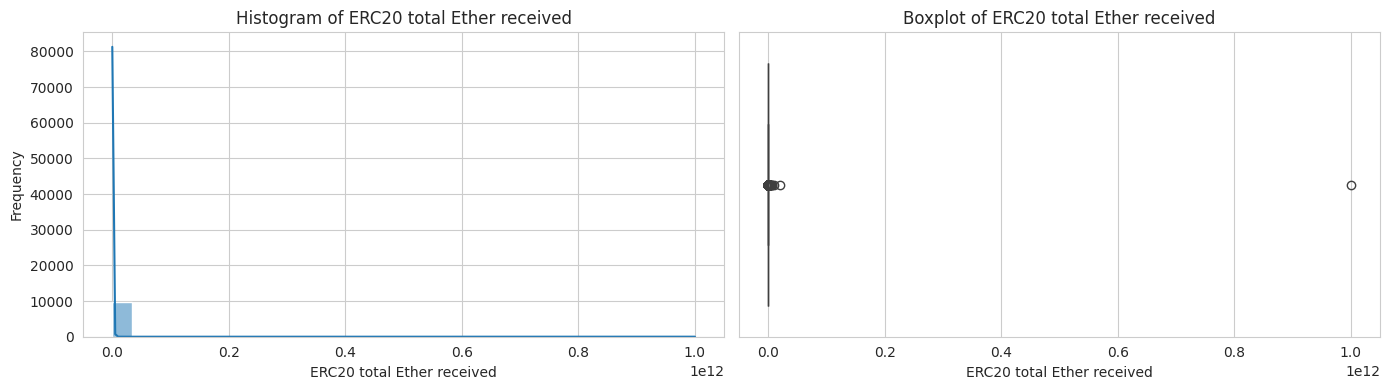

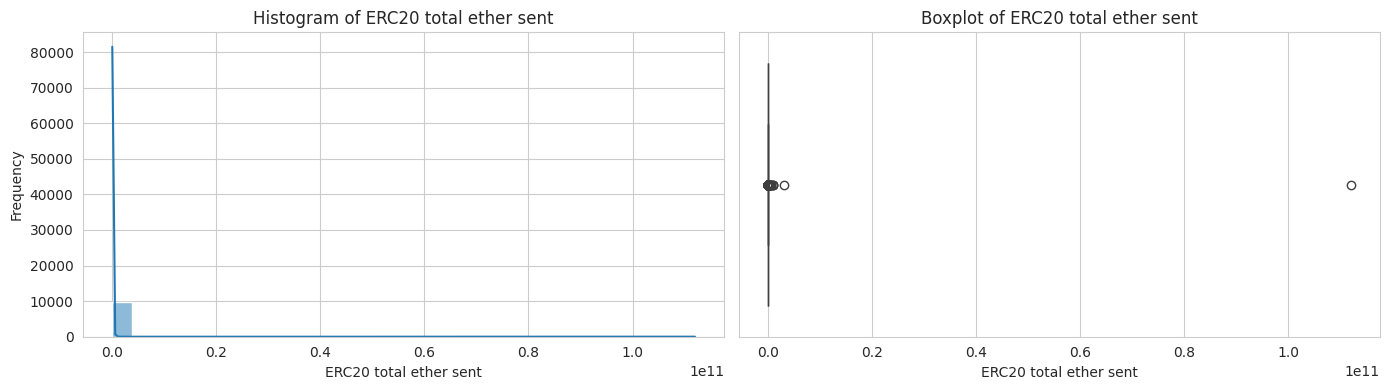

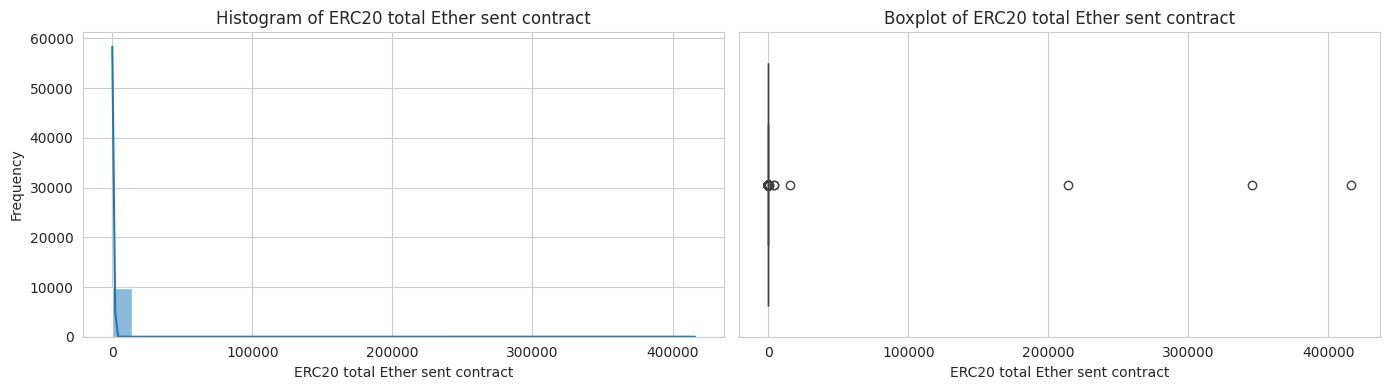

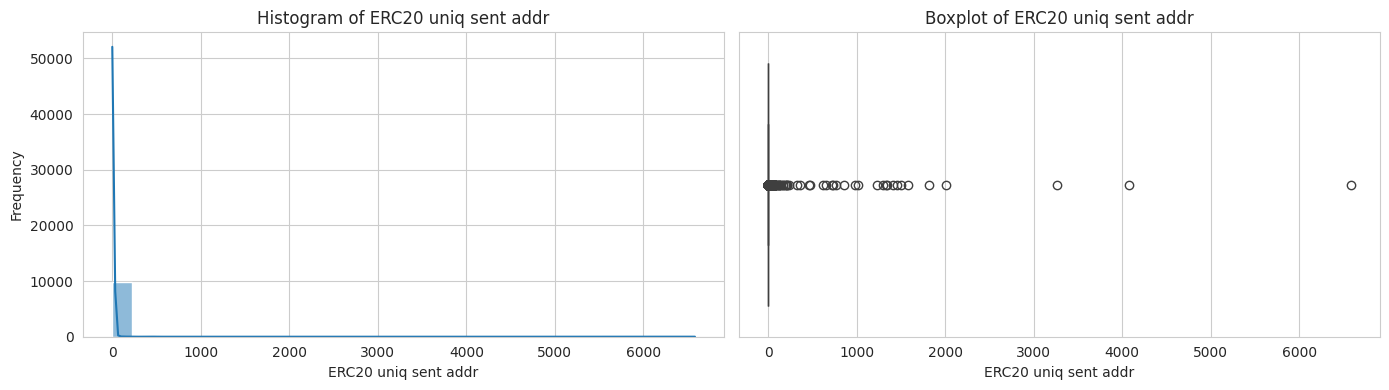

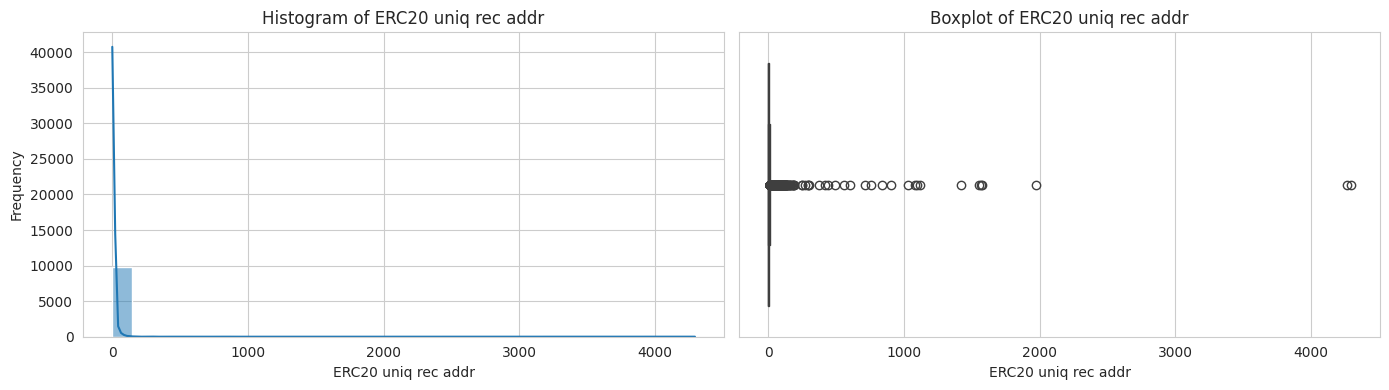

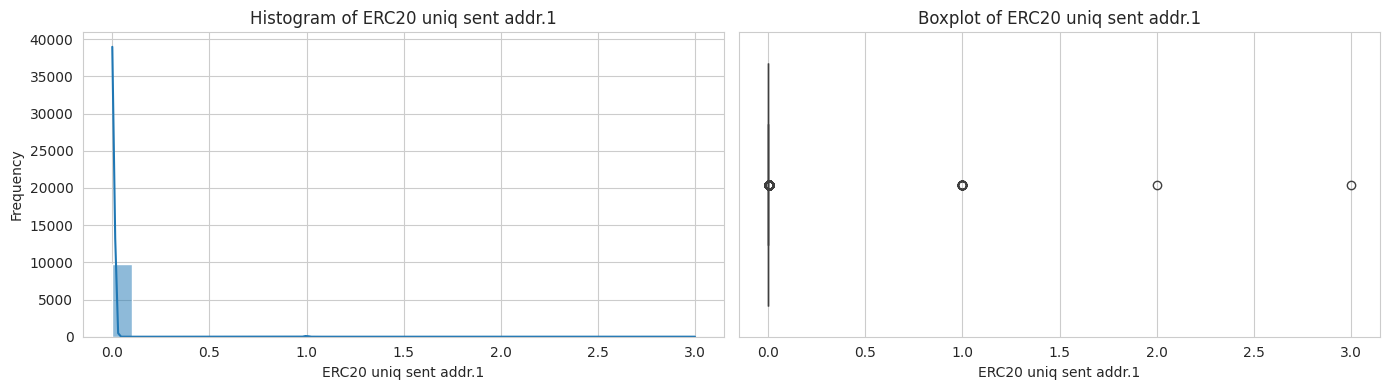

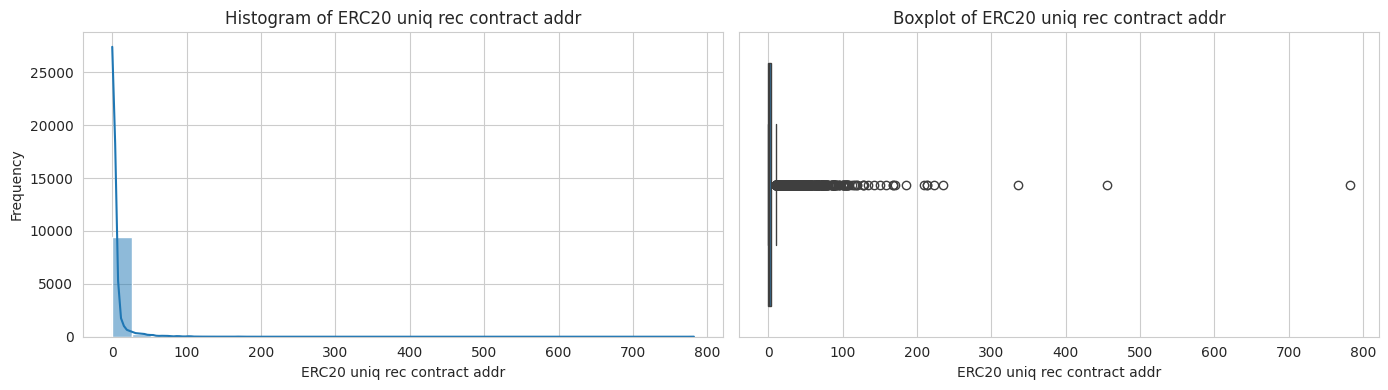

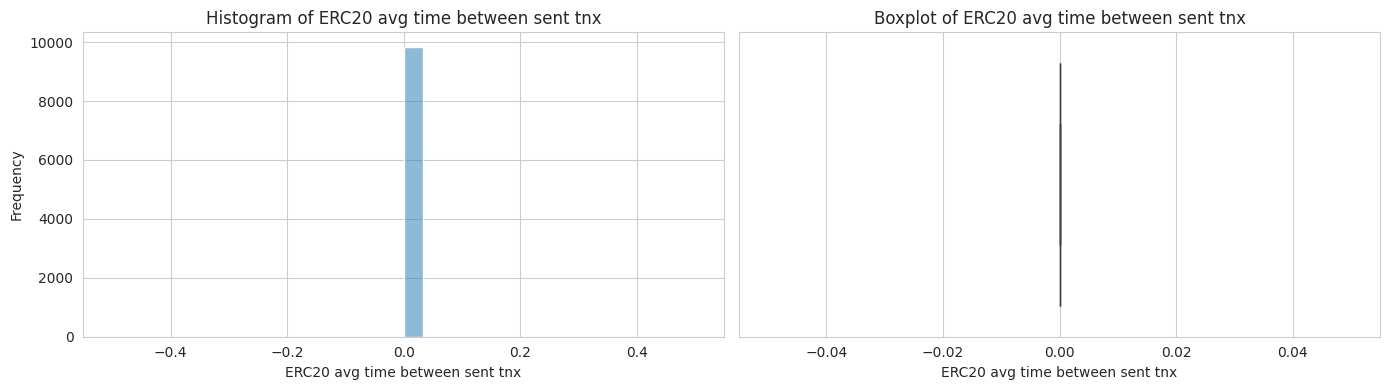

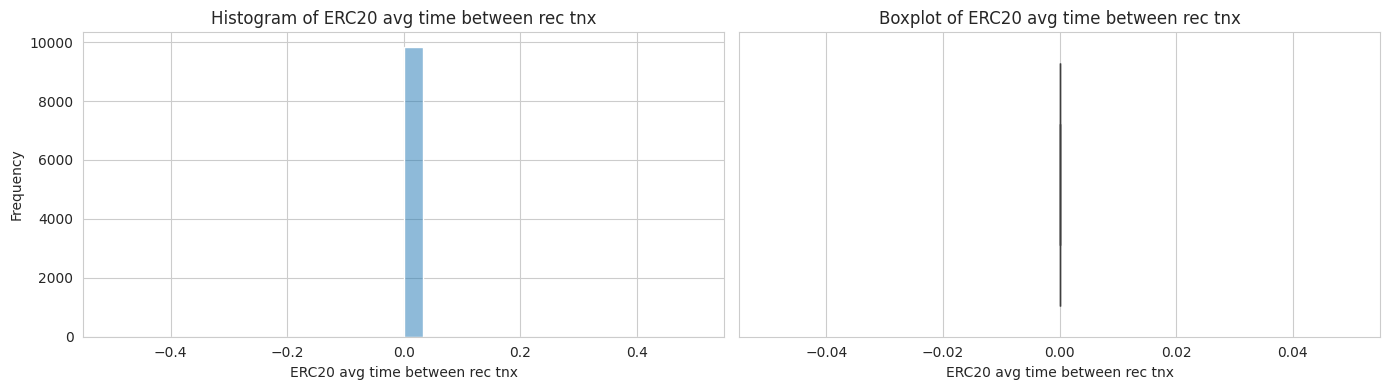

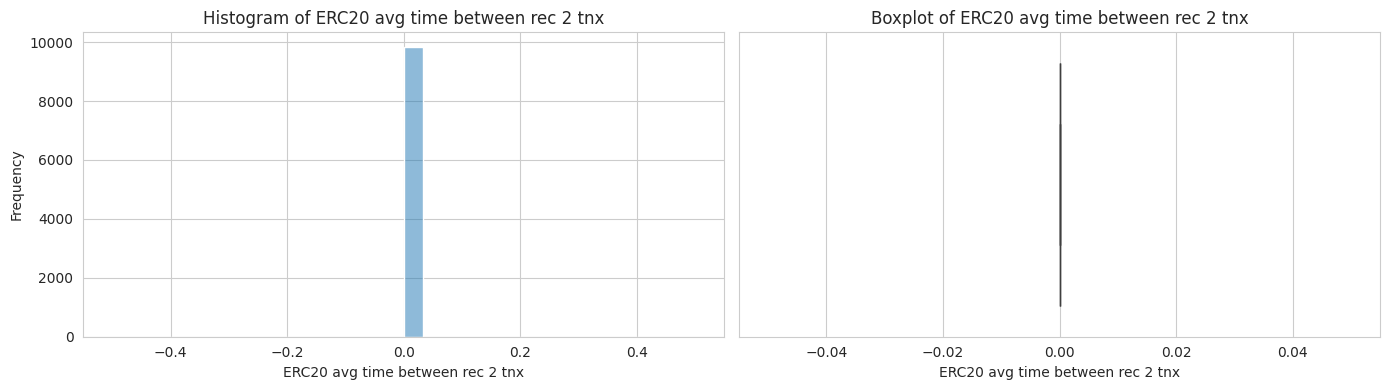

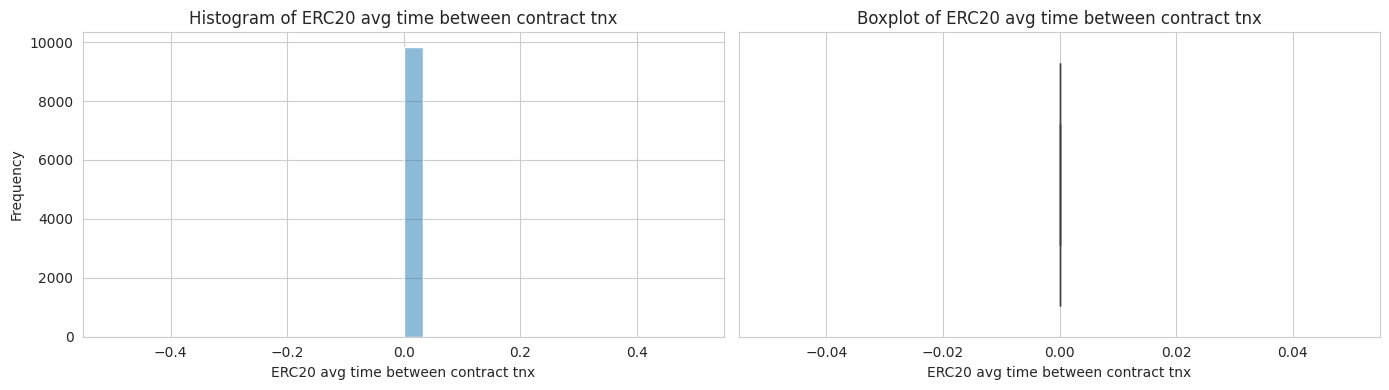

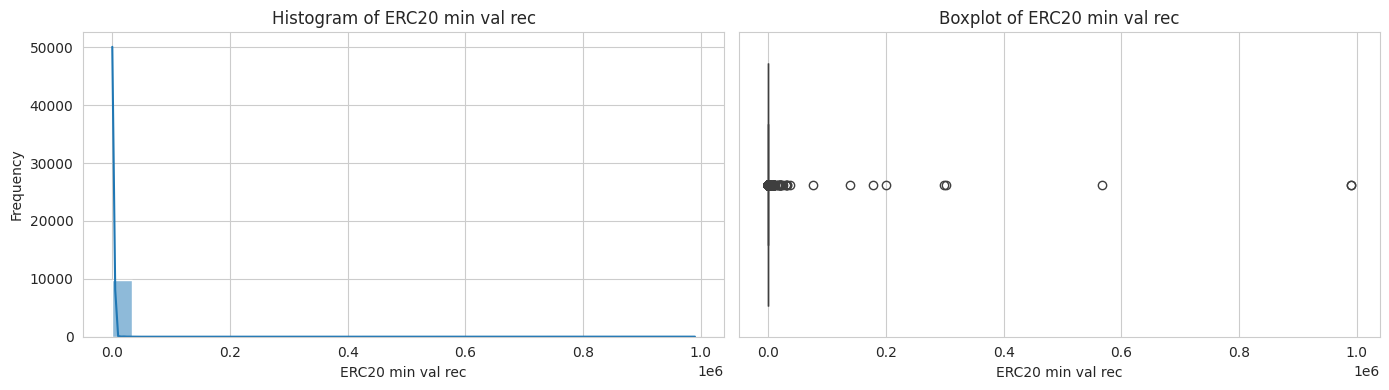

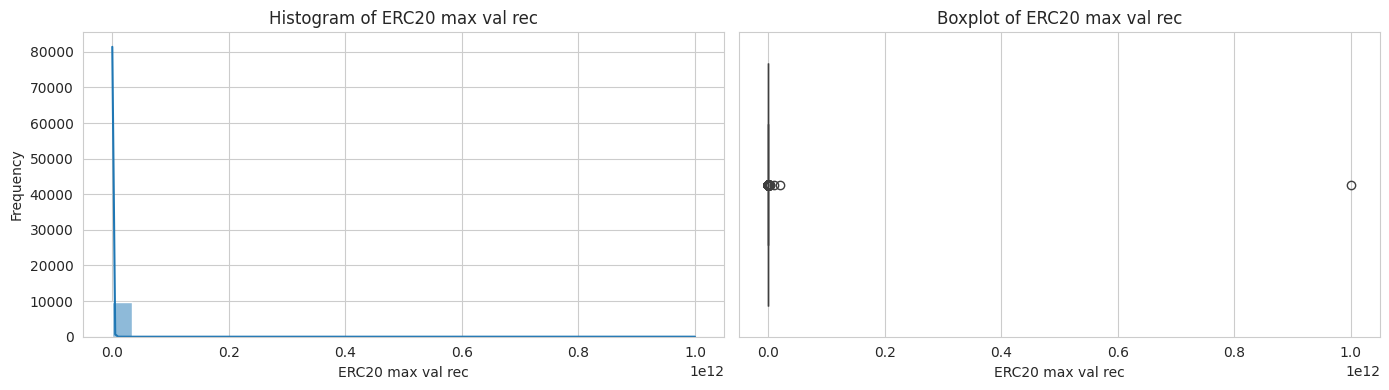

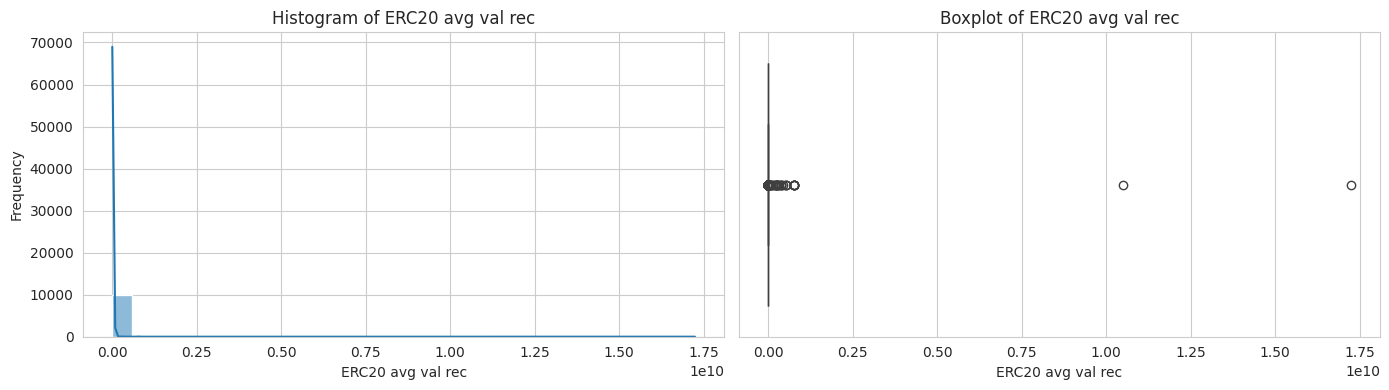

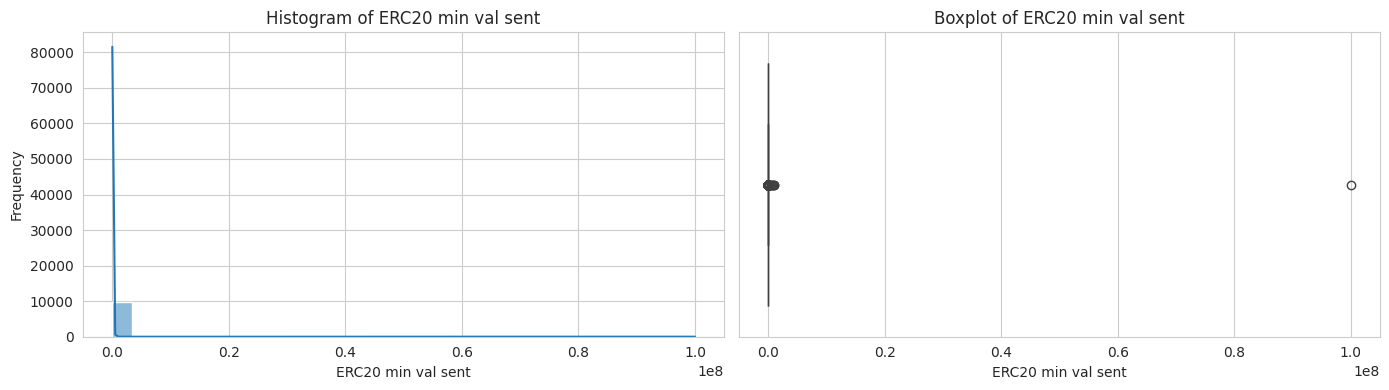

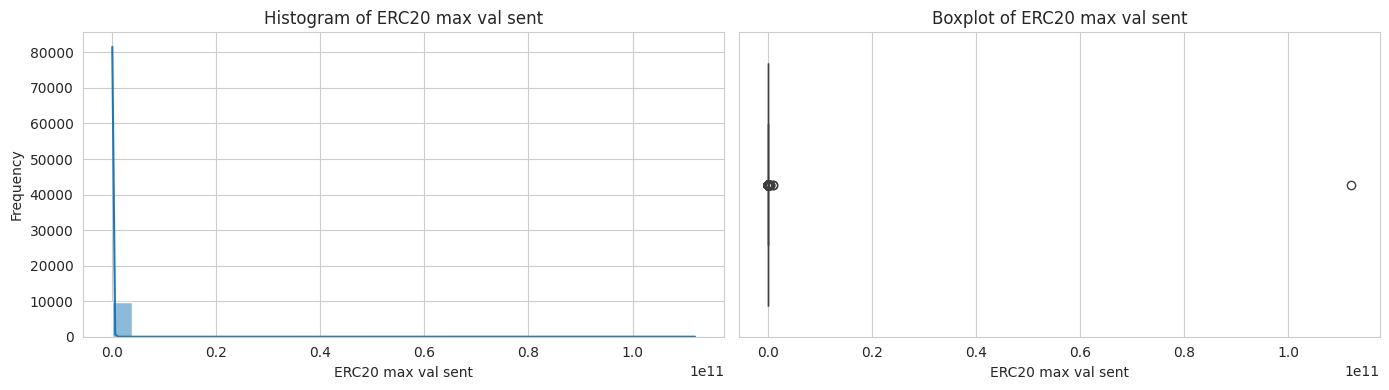

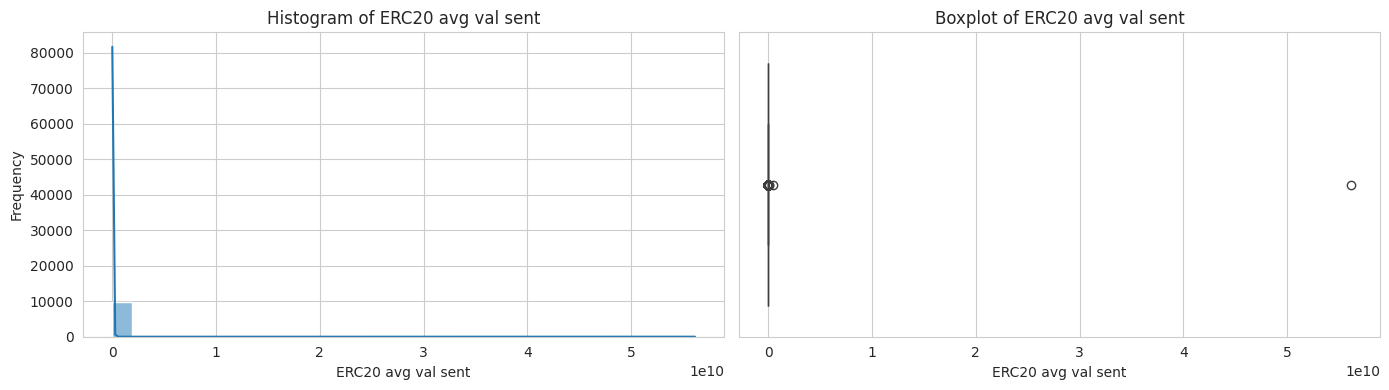

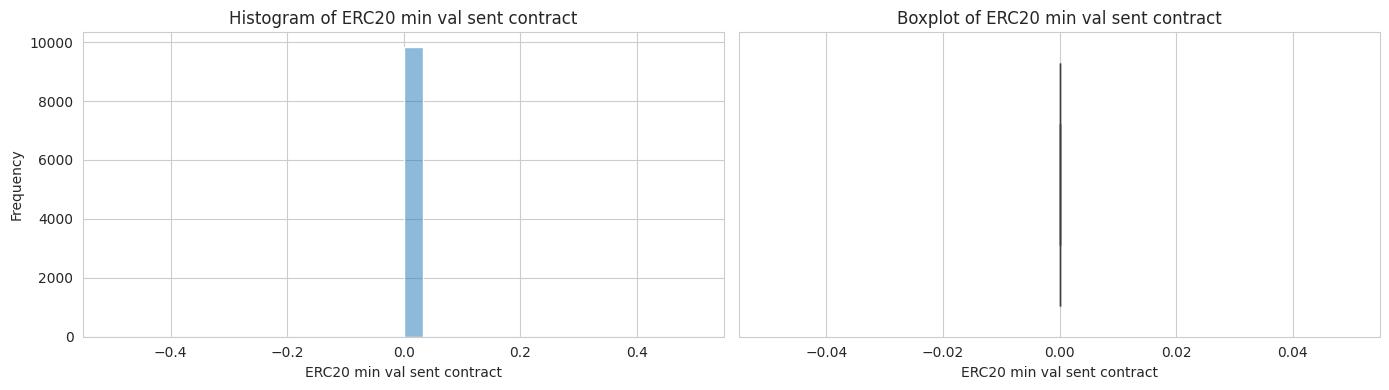

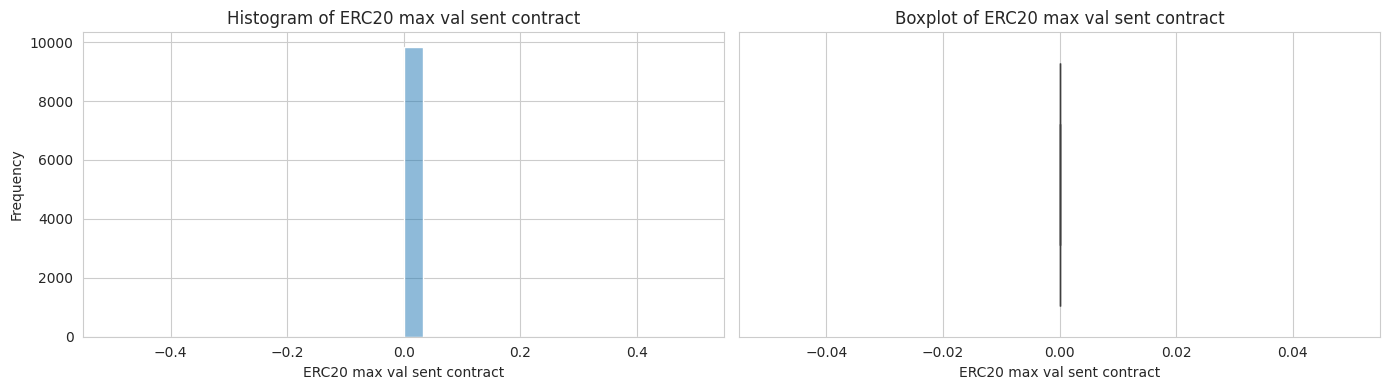

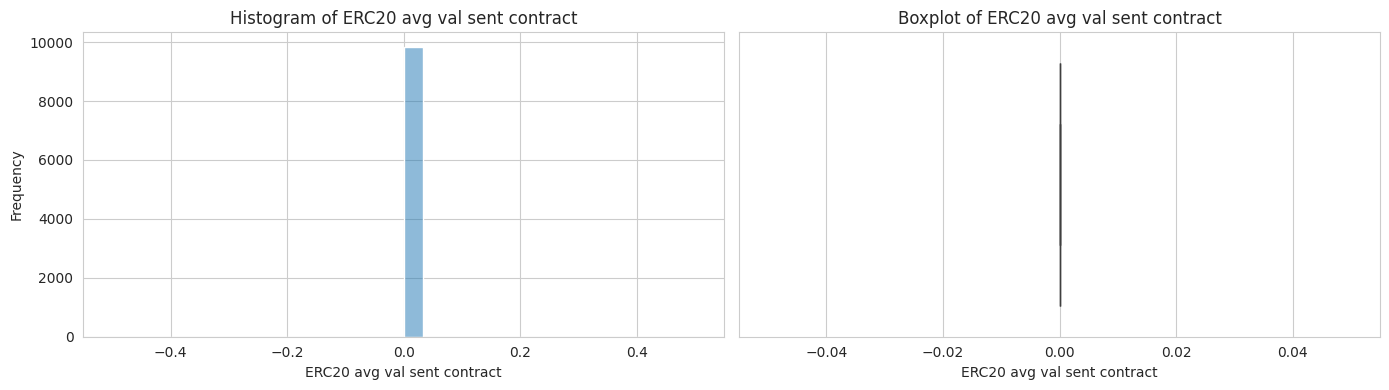

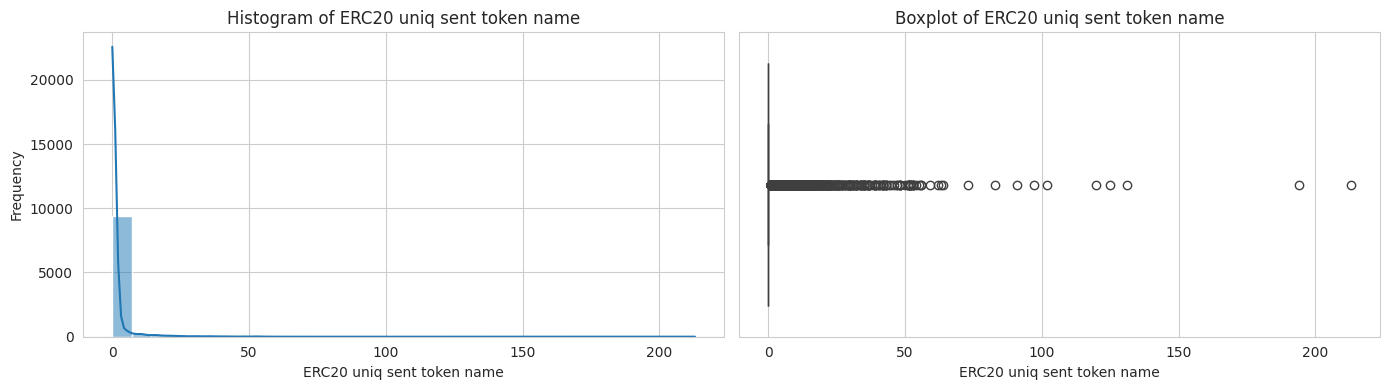

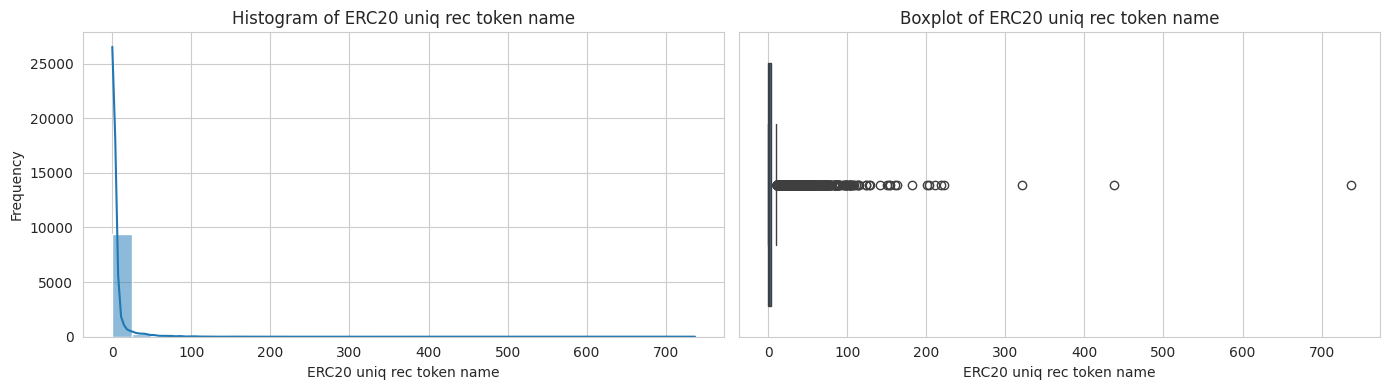

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

numeric_columns = X.select_dtypes(include=['number']).columns

for column in numeric_columns:
    fig, ax = plt.subplots(1, 2, figsize=(14, 4))

    # Histogram
    sns.histplot(X[column], bins=30, kde=True, ax=ax[0])
    ax[0].set_title(f'Histogram of {column}')
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(x=X[column], ax=ax[1])
    ax[1].set_title(f'Boxplot of {column}')
    ax[1].set_xlabel(column)

    plt.tight_layout()
    plt.show()


In [ ]:
X_categorical.shape

(9841, 3)

In [ ]:
X_categorical

,Address,ERC20 most sent token type,ERC20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,NaN,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,StatusNetwork,EOS
...,...,...,...
9836,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,,GSENetwork
9837,0xff718805bb9199ebf024ab6acd333e603ad77c85,,Blockwell say NOTSAFU
9838,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,,Free BOB Tokens - BobsRepair.com
9839,0xffde23396d57e10abf58bd929bb1e856c7718218,NaN,NaN


In [ ]:
unique_values_count = X_categorical.nunique()
unique_values_count

Address                       9816
ERC20 most sent token type     304
ERC20_most_rec_token_type      466
dtype: int64

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_numeric_all = pd.DataFrame(scaler.fit_transform(X_numeric_all), columns=X_numeric_all.columns)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

columns_to_encode = ['ERC20 most sent token type', 'ERC20_most_rec_token_type']

one_hot_encoder = OneHotEncoder(sparse=False)

encoded_data = one_hot_encoder.fit_transform(df[columns_to_encode])

encoded_columns = one_hot_encoder.get_feature_names_out(columns_to_encode)
encoded = pd.DataFrame(encoded_data, columns=encoded_columns)

X_categorical = X_categorical.drop(columns=columns_to_encode).join(encoded)
X_categorical.drop(columns=['Address'], inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_numeric_all

,Index,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
0,-1.483813,-0.197465,-0.299436,1.506411,0.799099,-0.079402,-0.02637,0.032280,0.349346,-0.134530,...,-1.093421e-02,-1.991605e-02,-1.164623e-02,3.361283e-03,-1.068335e-02,0.0,0.0,0.0,5.836461,3.269052e+00
1,-1.482995,0.354760,-0.218644,3.096367,-0.028965,-0.165500,-0.02637,-0.084931,-0.044882,-0.134530,...,-1.242178e-02,-2.121200e-02,-1.164399e-02,-1.154591e-02,-1.116354e-02,0.0,0.0,0.0,-0.059727,1.361752e-01
2,-1.482177,11.221900,-0.241365,0.924051,-0.150467,-0.163375,-0.02637,-0.068187,-0.090370,-0.134183,...,-1.242178e-02,-2.121197e-02,-1.164623e-02,-1.154591e-02,-1.116354e-02,0.0,0.0,0.0,-0.214890,1.988327e-01
3,-1.481359,0.238893,0.337091,0.555004,-0.120091,-0.164437,-0.02637,-0.078233,-0.048673,-0.134530,...,-1.242069e-02,-2.120469e-02,-1.154704e-02,-1.153791e-02,-1.115682e-02,0.0,0.0,0.0,-0.059727,3.868053e-01
4,-1.480541,-0.235055,0.117108,0.508294,5.919361,-0.152745,-0.01930,-0.078233,-0.025929,-0.134530,...,-1.241290e-02,-2.118820e-02,-1.164623e-02,-1.150605e-02,-1.113929e-02,0.0,0.0,0.0,0.716087,1.389326e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,0.294423,0.351318,-0.319467,-0.494191,-0.147826,-0.160186,-0.02637,-0.064838,-0.082788,-0.134518,...,-1.242182e-02,-2.121228e-02,-1.164623e-02,-1.154591e-02,-1.116354e-02,0.0,0.0,0.0,-0.214890,-1.771125e-01
9837,0.295241,-0.236759,-0.346822,-0.676119,-0.153108,-0.174004,-0.02637,-0.101676,-0.097951,-0.134530,...,-1.242182e-02,-2.121222e-02,-1.164623e-02,-1.154591e-02,-1.116354e-02,0.0,0.0,0.0,-0.214890,-2.397701e-01
9838,0.296059,-0.120427,-0.251968,0.133991,-0.064623,-0.128298,-0.02637,0.002140,0.068838,-0.134527,...,-1.242167e-02,-2.121082e-02,-1.164623e-02,-1.154591e-02,-1.116354e-02,0.0,0.0,0.0,-0.214890,1.086008e-02
9839,0.296877,-0.236759,-0.346822,-0.676119,-0.153108,-0.172941,-0.02637,-0.098327,-0.097951,-0.132996,...,1.477813e-18,4.545457e-18,-1.804268e-18,-1.649742e-18,1.645492e-18,0.0,0.0,0.0,0.000000,5.565108e-17


In [ ]:
numeric_column_names = X_numeric_all.columns

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


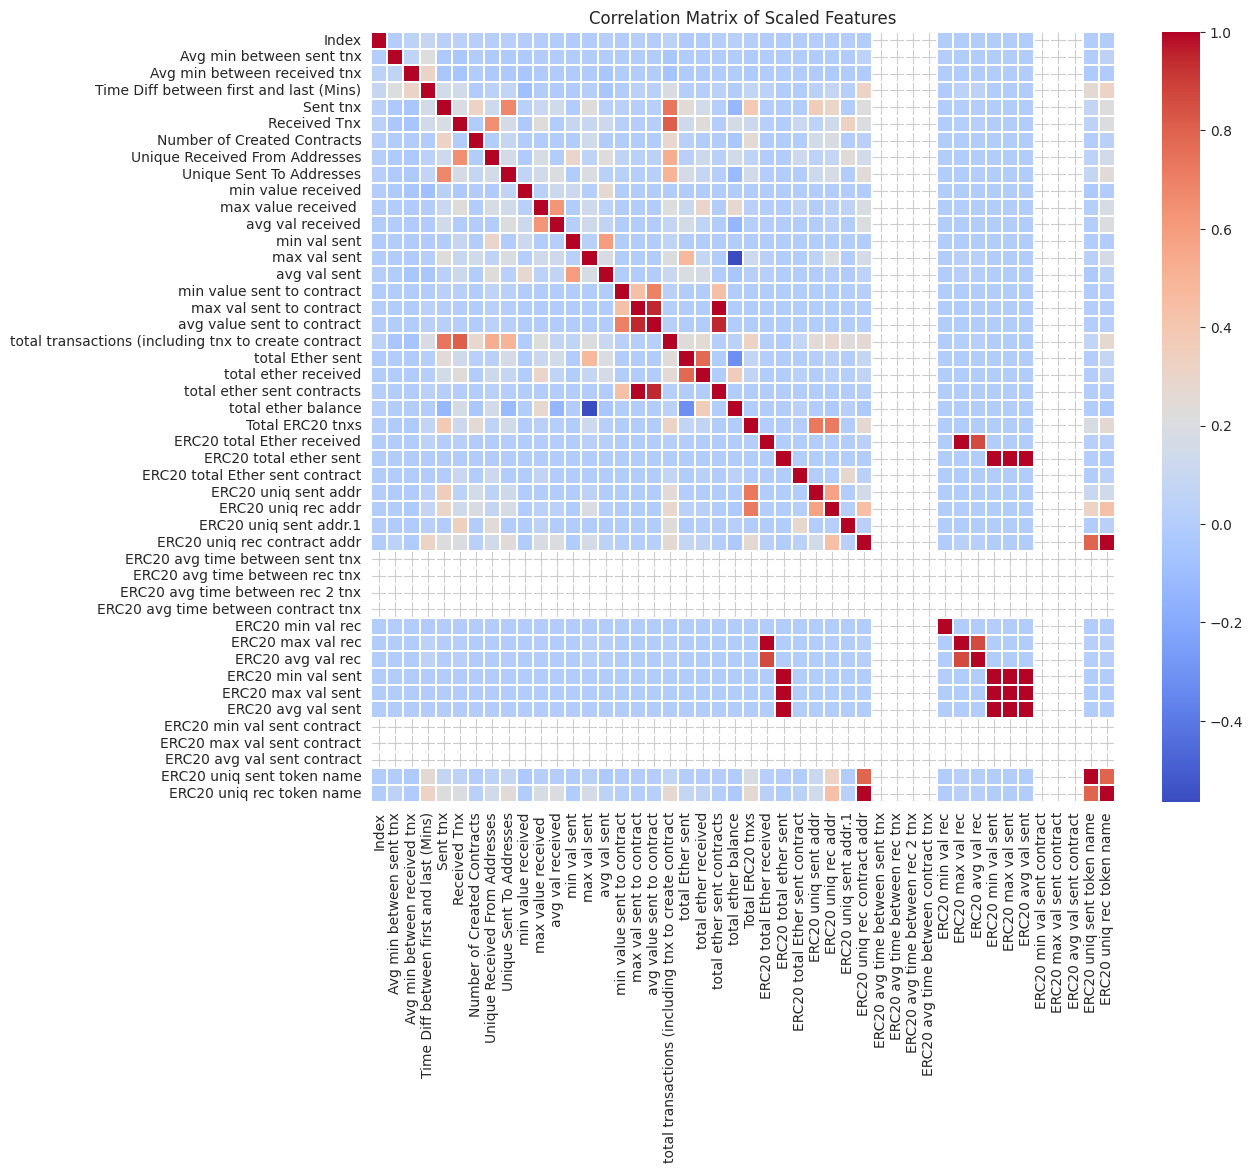

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = np.corrcoef(X_numeric_all.T)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.1, xticklabels=numeric_column_names, yticklabels=numeric_column_names)
plt.title("Correlation Matrix of Scaled Features")
plt.show()

In [ ]:
# Usuwanie skorelowanych i zbędnych kolumn ze zbioru danych
X_numeric = X_numeric_all.drop(columns=['max val sent to contract', 'Received Tnx', 'total ether sent contracts', 'min val sent', 'total transactions (including tnx to create contract', 'max value received ', 'Total ERC20 tnxs', 'ERC20 total Ether received', 'ERC20 total ether sent', 'ERC20 uniq rec contract addr', 'ERC20 min val sent', 'ERC20 max val sent', 'ERC20 max val rec', 'avg value sent to contract', 'ERC20 uniq sent token name', 'total ether received', 'max val sent', 'Sent tnx', 'ERC20 uniq rec addr',     'ERC20 avg time between sent tnx',
    'ERC20 avg time between rec tnx',
    'ERC20 avg time between rec 2 tnx',
    'ERC20 avg time between contract tnx',
    'ERC20 min val sent contract',
    'ERC20 max val sent contract',
    'ERC20 avg val sent contract'])


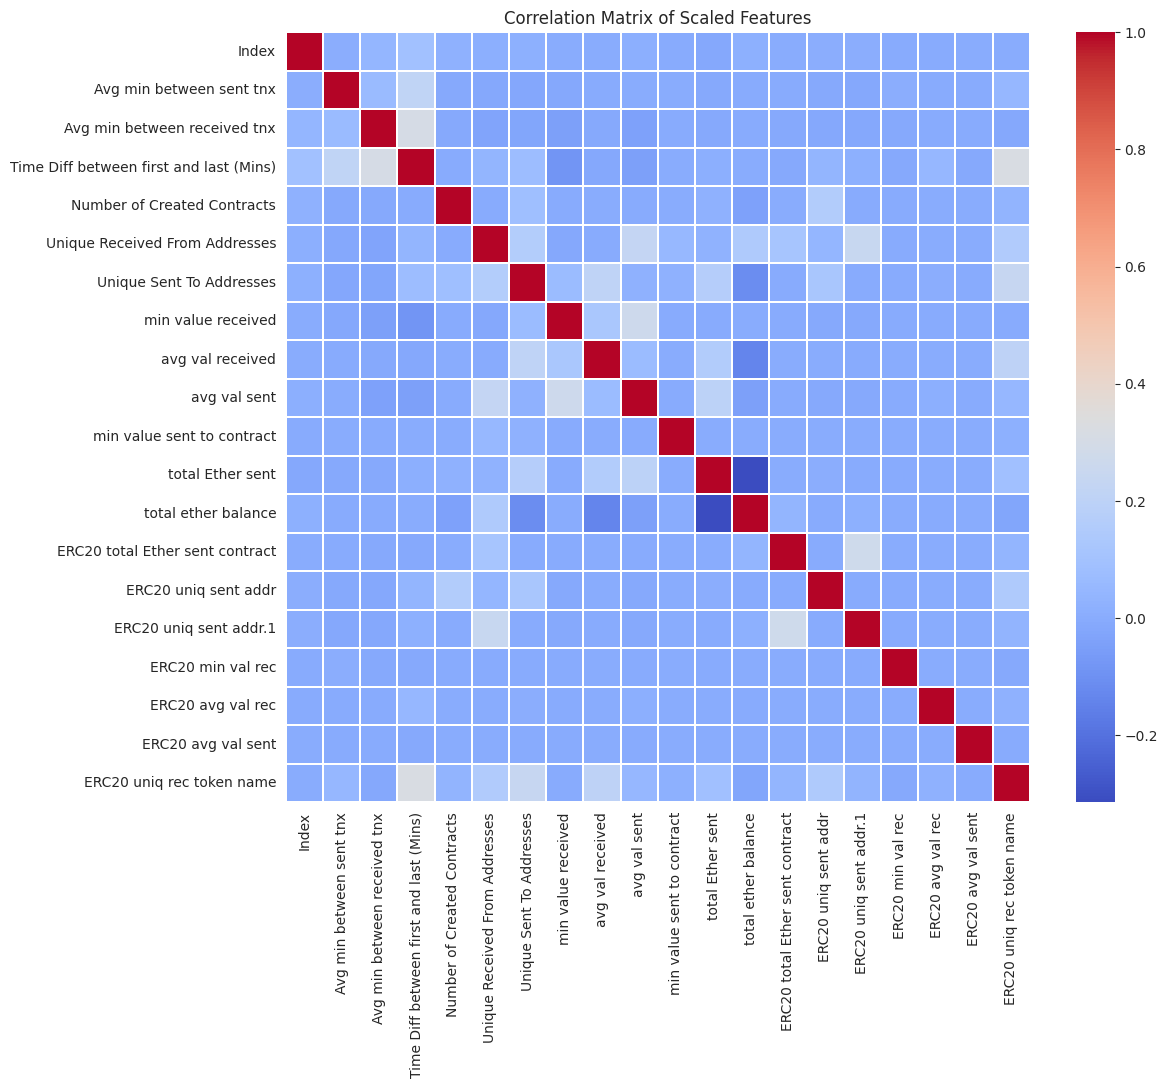

In [ ]:
numeric_names = X_numeric.columns.tolist()

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = np.corrcoef(X_numeric.T)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.1,  xticklabels=numeric_names, yticklabels=numeric_names)
plt.title("Correlation Matrix of Scaled Features")
plt.show()

In [ ]:
X_numeric.shape

(9841, 20)

In [ ]:
X_numeric.head()

,Index,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,avg val received,avg val sent,min value sent to contract,total Ether sent,total ether balance,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq sent addr.1,ERC20 min val rec,ERC20 avg val rec,ERC20 avg val sent,ERC20 uniq rec token name
0,-1.483813,-0.197465,-0.299436,1.506411,-0.02637,0.032280,0.349346,-0.134530,-0.032626,-0.182187,-0.013526,-0.025942,-0.007246,-0.018917,0.241887,-0.054717,-0.030059,-0.019916,-0.010683,3.269052
1,-1.482995,0.354760,-0.218644,3.096367,-0.02637,-0.084931,-0.044882,-0.134530,-0.034777,-0.187072,-0.013526,-0.028350,-0.006095,-0.018917,-0.046051,-0.054717,-0.030059,-0.021212,-0.011164,0.136175
2,-1.482177,11.221900,-0.241365,0.924051,-0.02637,-0.068187,-0.090370,-0.134183,-0.034786,-0.179704,-0.013526,-0.028348,-0.006095,-0.018917,-0.055979,-0.054717,-0.030059,-0.021212,-0.011164,0.198833
3,-1.481359,0.238893,0.337091,0.555004,-0.02637,-0.078233,-0.048673,-0.134530,-0.000424,0.105602,-0.013526,-0.023474,-0.009620,-0.018917,-0.036122,-0.054717,-0.030059,-0.021205,-0.011157,0.386805
4,-1.480541,-0.235055,0.117108,0.508294,-0.01930,-0.078233,-0.025929,-0.134530,-0.033985,-0.187114,-0.013526,-0.028067,-0.006304,-0.018917,-0.016264,-0.054717,-0.030059,-0.021188,-0.011139,1.389326


In [ ]:
X_categorical.head()

,ERC20 most sent token type_,ERC20 most sent token type_,ERC20 most sent token type_$7RIP$,ERC20 most sent token type_'',ERC20 most sent token type_0,ERC20 most sent token type_0xBitcoin Token,ERC20 most sent token type_0xcert Protocol Token,ERC20 most sent token type_1World,ERC20 most sent token type_300 Token,ERC20 most sent token type_AION,...,ERC20_most_rec_token_type_iEx.ec Network Token,ERC20_most_rec_token_type_iXledger,ERC20_most_rec_token_type_minereum,ERC20_most_rec_token_type_savedroid,ERC20_most_rec_token_type_shellchains.com,ERC20_most_rec_token_type_timereum,ERC20_most_rec_token_type_vSlice,ERC20_most_rec_token_type_www.pnztrust.com,ERC20_most_rec_token_type_yocoinclassic,ERC20_most_rec_token_type_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = pd.concat([X_numeric, X_categorical], axis=1)

In [ ]:
X

,Index,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,avg val received,avg val sent,...,ERC20_most_rec_token_type_iEx.ec Network Token,ERC20_most_rec_token_type_iXledger,ERC20_most_rec_token_type_minereum,ERC20_most_rec_token_type_savedroid,ERC20_most_rec_token_type_shellchains.com,ERC20_most_rec_token_type_timereum,ERC20_most_rec_token_type_vSlice,ERC20_most_rec_token_type_www.pnztrust.com,ERC20_most_rec_token_type_yocoinclassic,ERC20_most_rec_token_type_nan
0,-1.483813,-0.197465,-0.299436,1.506411,-0.02637,0.032280,0.349346,-0.134530,-0.032626,-0.182187,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.482995,0.354760,-0.218644,3.096367,-0.02637,-0.084931,-0.044882,-0.134530,-0.034777,-0.187072,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.482177,11.221900,-0.241365,0.924051,-0.02637,-0.068187,-0.090370,-0.134183,-0.034786,-0.179704,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.481359,0.238893,0.337091,0.555004,-0.02637,-0.078233,-0.048673,-0.134530,-0.000424,0.105602,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.480541,-0.235055,0.117108,0.508294,-0.01930,-0.078233,-0.025929,-0.134530,-0.033985,-0.187114,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,0.294423,0.351318,-0.319467,-0.494191,-0.02637,-0.064838,-0.082788,-0.134518,-0.033933,-0.148867,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9837,0.295241,-0.236759,-0.346822,-0.676119,-0.02637,-0.101676,-0.097951,-0.134530,-0.034910,-0.187209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9838,0.296059,-0.120427,-0.251968,0.133991,-0.02637,0.002140,0.068838,-0.134527,-0.034483,-0.183352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9839,0.296877,-0.236759,-0.346822,-0.676119,-0.02637,-0.098327,-0.097951,-0.132996,-0.034737,-0.187209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X.describe()

,Index,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,avg val received,avg val sent,...,ERC20_most_rec_token_type_iEx.ec Network Token,ERC20_most_rec_token_type_iXledger,ERC20_most_rec_token_type_minereum,ERC20_most_rec_token_type_savedroid,ERC20_most_rec_token_type_shellchains.com,ERC20_most_rec_token_type_timereum,ERC20_most_rec_token_type_vSlice,ERC20_most_rec_token_type_www.pnztrust.com,ERC20_most_rec_token_type_yocoinclassic,ERC20_most_rec_token_type_nan
count,9.841000e+03,9.841000e+03,9.841000e+03,9.841000e+03,9.841000e+03,9.841000e+03,9841.000000,9.841000e+03,9.841000e+03,9.841000e+03,...,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000
mean,8.086656e-17,2.599282e-17,-1.155237e-17,-3.465710e-17,-1.444046e-18,-2.888092e-18,0.000000,7.220229e-18,2.888092e-18,1.155237e-17,...,0.000102,0.000102,0.000508,0.000102,0.000305,0.000102,0.000102,0.003252,0.000102,0.088507
std,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051,1.000051e+00,1.000051e+00,1.000051e+00,...,0.010080,0.010080,0.022536,0.010080,0.017458,0.010080,0.010080,0.056934,0.010080,0.284046
min,-1.483813e+00,-2.367591e-01,-3.468225e-01,-6.761186e-01,-2.636980e-02,-1.016756e-01,-0.097951,-1.345304e-01,-3.491049e-02,-1.872092e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.130890e-01,-2.367591e-01,-3.468225e-01,-6.751372e-01,-2.636980e-02,-9.832671e-02,-0.094160,-1.345273e-01,-3.476251e-02,-1.868487e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.423651e-01,-2.359521e-01,-3.247359e-01,-5.316965e-01,-2.636980e-02,-9.497781e-02,-0.090370,-1.342363e-01,-3.431090e-02,-1.804914e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.428726e-01,-2.104404e-01,-1.093762e-01,2.655064e-01,-2.636980e-02,-8.493113e-02,-0.086579,-1.283938e-01,-2.728446e-02,-9.518775e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.383483e+00,1.979017e+01,2.054417e+01,5.377553e+00,7.064044e+01,3.338393e+01,35.105815,3.054854e+01,9.827810e+01,5.000770e+01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

n_components_retained = pca.n_components_
explained_variance_ratio = pca.explained_variance_ratio_

print(f"Liczba zachowanych komponentów: {n_components_retained}")
print(f"Wyjaśniona wariancja przez każdy komponent: {explained_variance_ratio}")


Liczba zachowanych komponentów: 20
Wyjaśniona wariancja przez każdy komponent: [0.09385131 0.07613028 0.07258305 0.06269212 0.05769978 0.05763637
 0.05492456 0.05222581 0.04831211 0.04766915 0.04714064 0.04494075
 0.04122849 0.03875938 0.03737858 0.03208868 0.02866075 0.02456152
 0.02313447 0.01982949]


In [ ]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9836    1.0
9837    1.0
9838    1.0
9839    1.0
9840    1.0
Name: FLAG, Length: 9841, dtype: float64

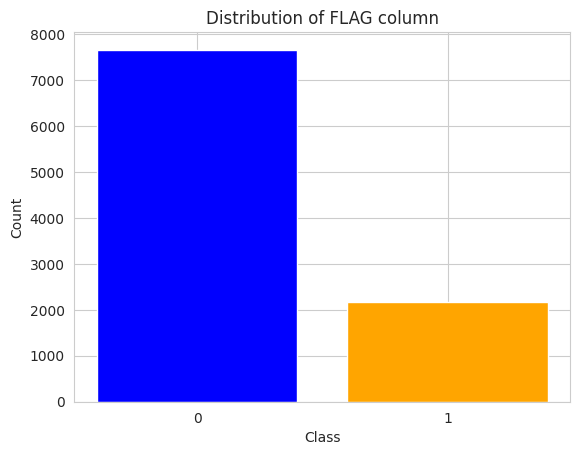

In [ ]:
values, counts = np.unique(y, return_counts=True)


plt.bar(values, counts, tick_label=['0', '1'], color=['blue', 'orange'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of FLAG column')

plt.show()

In [ ]:
counts

array([7662, 2179])

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=0.8, random_state=42)

X_train, y_train = rus.fit_resample(X_train, y_train)

print(y_train.value_counts())


FLAG
0.0    2190
1.0    1752
Name: count, dtype: int64


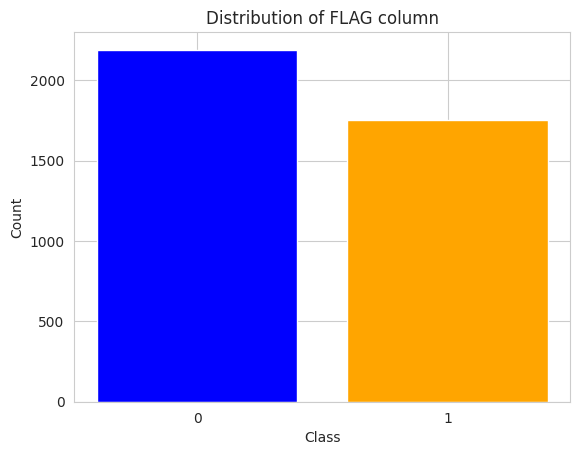

In [ ]:
values, counts = np.unique(y_train, return_counts=True)


plt.bar(values, counts, tick_label=['0', '1'], color=['blue', 'orange'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of FLAG column')

plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
logreg_report = classification_report(y_test, y_pred_logreg)
print('Logistic Regression Performance:')
print(logreg_report)

# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_report = classification_report(y_test, y_pred_knn)
print('K-Nearest Neighbors Performance:')
print(knn_report)

# Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)
dtree_report = classification_report(y_test, y_pred_dt)
print('Decision Tree Performance:')
print(dtree_report)

Logistic Regression Performance:
              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94      1542
         1.0       0.73      0.93      0.82       427

    accuracy                           0.91      1969
   macro avg       0.86      0.92      0.88      1969
weighted avg       0.93      0.91      0.92      1969

K-Nearest Neighbors Performance:
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      1542
         1.0       0.84      0.95      0.89       427

    accuracy                           0.95      1969
   macro avg       0.91      0.95      0.93      1969
weighted avg       0.95      0.95      0.95      1969

Decision Tree Performance:
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97      1542
         1.0       0.85      0.95      0.90       427

    accuracy                           0.95      1969
   macro avg       0.92      0.95  

In [ ]:
from sklearn.metrics import accuracy_score
import pandas as pd


accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_dt = accuracy_score(y_test, y_pred_dt)


accuracy_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree'],
    'Accuracy': [accuracy_logreg, accuracy_knn, accuracy_dt]
})


print("Model Comparison - Accuracy:")
accuracy_df

Model Comparison - Accuracy:


,Model,Accuracy
0,Logistic Regression,0.911630
1,K-Nearest Neighbors,0.950736
2,Decision Tree,0.952768


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score

models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbor": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

cv_accuracy_means = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_accuracy_means[name] = scores.mean()

accuracy_df = pd.DataFrame(list(cv_accuracy_means.items()), columns=['Model', 'Cross-Validation Accuracy'])

print("\nModel Comparison - Cross-Validation Accuracy:")
accuracy_df



Model Comparison - Cross-Validation Accuracy:


,Model,Cross-Validation Accuracy
0,Logistic Regression,0.917299
1,K-Nearest Neighbor,0.949771
2,Decision Tree,0.941403


Metoda k-najbliższych sąsiadów (K-NN) okazała się być najlepszym modelem, wyróżniającym się najwyższą dokładnością (na poziomie 95%) wśród innych ocenianych metod, takich jak regresja logistyczna, czy drzewo decyzyjne. Charakteryzuje ją również wysoka pełność i precyzja.